In [1]:
%matplotlib inline

import numpy as np
from scipy.misc import logsumexp
from matplotlib import pyplot as pl

For a signal with an SNR of approximately 10, check how often we might expect "tension" between the posteriors.

In [24]:
f = 4.23
phi0 = 2.0

def sin_signal(f0, phi0, ts, t0):
    return np.sin(2.*np.pi*f0*(ts-t0) + phi0)

def logtrapz(lys, xvs):
    deltas = np.log(np.diff(xvs))
    return -np.log(2.) + logsumexp([logsumexp(lys[:-1]+deltas), logsumexp(lys[1:]+deltas)])

# generate a signal
ts = np.linspace(0., 1., 100.)
sig = sin_signal(f, phi0, ts, ts[0])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


In [22]:
sigma = 0.73 # gives SNR of just under 10 for this signal

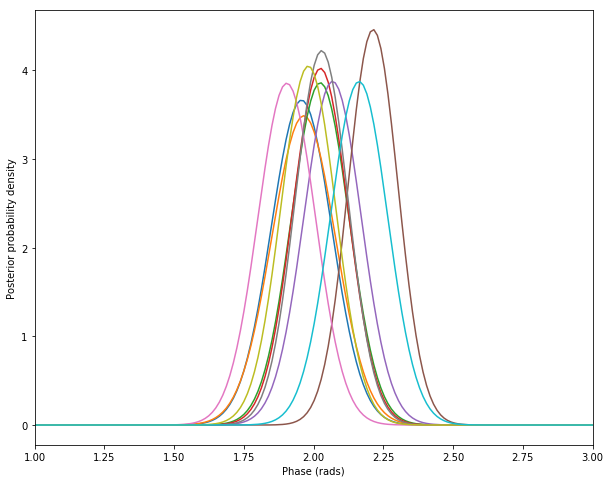

In [36]:
Nreals = 10 # number of noise realisations

phis = np.linspace(0., 2.*np.pi, 500)
logposts = np.zeros(len(phis))

fig, ax = pl.subplots(figsize=(10,8))

for i in range(Nreals):
    noise = np.random.randn(len(ts))*sigma
    data1 = sig + noise

    for i, phi in enumerate(phis):
        logposts[i] = -0.5*len(sig)*np.log(2.*np.pi*sigma**2) - np.sum(0.5*(data1-sin_signal(f, phi, ts, ts[0]))**2/sigma**2)
    logposts -= np.log(2.*np.pi) # mulitply by prior

    # marginalise to get evidence
    Zs = logtrapz(logposts, phis)
    
    posts = np.exp(logposts-Zs)
    
    ax.plot(phis, posts)

ax.set_xlim([1., 3.])
ax.set_xlabel('Phase (rads)')
ax.set_ylabel('Posterior probability density')